In [14]:
from asyncio import timeout

pip install --upgrade pip

In [17]:
pip install tensorflow --default-timeout=100


  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.28.3-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached wrapt-1.17.0-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached grpcio-1.68.0-cp312-cp312-win_amd64.whl.metada

  You can safely remove it manually.
  You can safely remove it manually.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [3]:
df = pd.read_csv('C:\\Users\\CRAIA-AREA EDUCATORI\\Documents\\Università\\Machine Learning\\beer_data\\beer_reviews.csv')

# Seleziona le feature e il target
features = ['review_aroma', 'review_taste', 'review_palate', 'review_appearance']
target = 'review_overall'

# Creazione dei dataset
X = df[features]
y = df[target]

# Divisione in train, validation e test set (70%-15%-15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardizzazione delle feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [22]:
# Creazione del modello
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.3),  # Riduce l'overfitting
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')  # Uscita per regressione
])

# Compilazione del modello
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])


C:\Users\CRAIA-AREA EDUCATORI\Documents\Università\interprete\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,  # Numero iniziale di epoche
    batch_size=128,
    verbose=1
)


Epoch 1/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - loss: 0.8073 - mae: 0.6277 - val_loss: 0.1822 - val_mae: 0.3222
Epoch 2/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - loss: 0.1927 - mae: 0.3331 - val_loss: 0.1889 - val_mae: 0.3292
Epoch 3/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - loss: 0.1847 - mae: 0.3235 - val_loss: 0.1929 - val_mae: 0.3320
Epoch 4/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - loss: 0.1832 - mae: 0.3220 - val_loss: 0.1890 - val_mae: 0.3287
Epoch 5/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - loss: 0.1835 - mae: 0.3223 - val_loss: 0.1953 - val_mae: 0.3331
Epoch 6/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - loss: 0.1824 - mae: 0.3214 - val_loss: 0.1924 - val_mae: 0.3317
Epoch 7/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - loss: 0.1824 - mae: 0.3212 - val_loss: 0.1905 - val_mae: 0.3301
Epoch 8/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - loss: 0.1827 - mae: 0.3216 - val_loss: 0.1909 - val_mae: 0.3306
Epoch 9/50
8677/8677 ━━━━━━━━━━━

In [24]:
# Predizioni e valutazione sul test set
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')


7438/7438 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
Mean Squared Error (MSE): 0.19469235465648757
Mean Absolute Error (MAE): 0.332804296639034


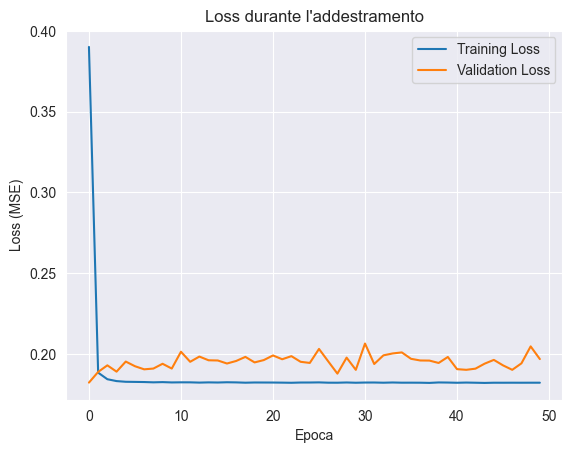

In [25]:
import matplotlib.pyplot as plt

# Grafico della perdita durante l'addestramento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss durante l\'addestramento')
plt.xlabel('Epoca')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()


In [1]:
# Il training loss diminuisce rapidamente nelle prime epoche e poi si stabilizza. La stabilizzazione del training loss è un buon segno: il modello si sta adattando al dataset di addestramento.

#Il validation loss è relativamente stabile ma mostra qualche oscillazione verso la fine. L'oscillazione nel validation loss potrebbe indicare che il modello sta iniziando a sovradattarsi leggermente ai dati di addestramento.

# i possibili miglioramenti possono essere:ridurre il numero delle epoche, sistemare la regolarizzazione oppure provare con il dropout per diminuire l'overfitting

In [5]:
from tensorflow.keras.layers import Dropout

# Architettura con Dropout
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),  # Aggiunge un tasso di dropout del 20%
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])
# Compilazione del modello
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])


C:\Users\CRAIA-AREA EDUCATORI\Documents\Università\interprete\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,  # Numero iniziale di epoche
    batch_size=128,
    verbose=1
)


Epoch 1/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - loss: 0.7721 - mae: 0.5974 - val_loss: 0.1772 - val_mae: 0.3194
Epoch 2/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - loss: 0.1929 - mae: 0.3344 - val_loss: 0.1811 - val_mae: 0.3220
Epoch 3/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - loss: 0.1831 - mae: 0.3226 - val_loss: 0.1809 - val_mae: 0.3220
Epoch 4/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - loss: 0.1822 - mae: 0.3216 - val_loss: 0.1829 - val_mae: 0.3245
Epoch 5/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - loss: 0.1822 - mae: 0.3217 - val_loss: 0.1777 - val_mae: 0.3198
Epoch 6/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - loss: 0.1820 - mae: 0.3213 - val_loss: 0.1851 - val_mae: 0.3263
Epoch 7/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 0.1818 - mae: 0.3211 - val_loss: 0.1812 - val_mae: 0.3224
Epoch 8/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - loss: 0.1820 - mae: 0.3215 - val_loss: 0.1834 - val_mae: 0.3243
Epoch 9/50
8677/8677 ━━━━━━━━━━━

In [7]:
# Predizioni e valutazione sul test set
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')


7438/7438 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step
Mean Squared Error (MSE): 0.18300693999617113
Mean Absolute Error (MAE): 0.3251618105337179


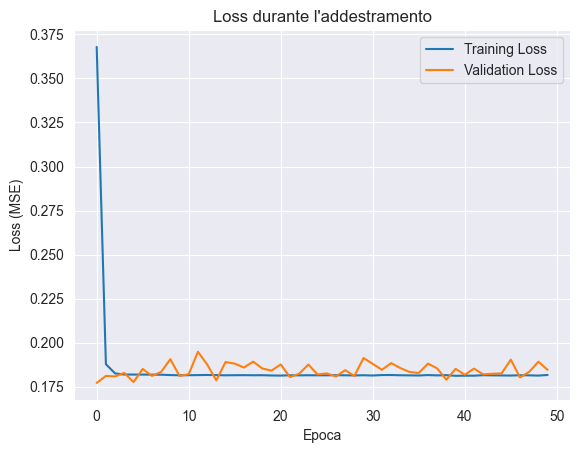

In [8]:
import matplotlib.pyplot as plt

# Grafico della perdita durante l'addestramento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss durante l\'addestramento')
plt.xlabel('Epoca')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()


In [9]:
# Architettura con più livelli
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])
# Compilazione del modello
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

C:\Users\CRAIA-AREA EDUCATORI\Documents\Università\interprete\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,  # Numero iniziale di epoche
    batch_size=128,
    verbose=1
)


Epoch 1/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - loss: 0.4788 - mae: 0.4140 - val_loss: 0.1757 - val_mae: 0.3181
Epoch 2/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - loss: 0.1757 - mae: 0.3160 - val_loss: 0.1754 - val_mae: 0.3181
Epoch 3/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 0.1747 - mae: 0.3156 - val_loss: 0.1773 - val_mae: 0.3184
Epoch 4/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 0.1741 - mae: 0.3150 - val_loss: 0.1745 - val_mae: 0.3137
Epoch 5/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 0.1737 - mae: 0.3146 - val_loss: 0.1731 - val_mae: 0.3142
Epoch 6/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 0.1735 - mae: 0.3144 - val_loss: 0.1743 - val_mae: 0.3154
Epoch 7/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - loss: 0.1741 - mae: 0.3148 - val_loss: 0.1729 - val_mae: 0.3133
Epoch 8/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - loss: 0.1737 - mae: 0.3145 - val_loss: 0.1727 - val_mae: 0.3139
Epoch 9/50
8677/8677 ━━━━━━━━━━━

In [11]:
# Predizioni e valutazione sul test set
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')


7438/7438 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step
Mean Squared Error (MSE): 0.17147817815715158
Mean Absolute Error (MAE): 0.31310538929080467


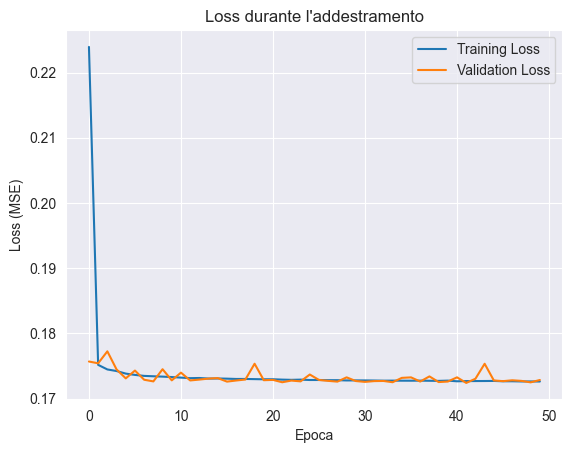

In [12]:
import matplotlib.pyplot as plt

# Grafico della perdita durante l'addestramento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss durante l\'addestramento')
plt.xlabel('Epoca')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()


In [13]:
from tensorflow.keras.layers import BatchNormalization

# Architettura con Batch Normalization
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),  # Normalizza le uscite di ogni livello
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='linear')
])
# Compilazione del modello
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])


C:\Users\CRAIA-AREA EDUCATORI\Documents\Università\interprete\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,  # Numero iniziale di epoche
    batch_size=128,
    verbose=1
)


Epoch 1/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - loss: 1.1638 - mae: 0.6176 - val_loss: 0.1756 - val_mae: 0.3160
Epoch 2/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - loss: 0.1804 - mae: 0.3212 - val_loss: 0.1754 - val_mae: 0.3184
Epoch 3/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - loss: 0.1783 - mae: 0.3192 - val_loss: 0.1774 - val_mae: 0.3131
Epoch 4/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - loss: 0.1787 - mae: 0.3193 - val_loss: 0.1751 - val_mae: 0.3127
Epoch 5/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - loss: 0.1784 - mae: 0.3191 - val_loss: 0.1756 - val_mae: 0.3116
Epoch 6/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - loss: 0.1777 - mae: 0.3182 - val_loss: 0.1749 - val_mae: 0.3189
Epoch 7/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - loss: 0.1776 - mae: 0.3185 - val_loss: 0.1735 - val_mae: 0.3152
Epoch 8/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - loss: 0.1779 - mae: 0.3187 - val_loss: 0.1743 - val_mae: 0.3154
Epoch 9/50
8677/8677 ━━━━━━━━━━━

In [15]:
# Predizioni e valutazione sul test set
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')


7438/7438 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step
Mean Squared Error (MSE): 0.17257652897701975
Mean Absolute Error (MAE): 0.3148467720091108


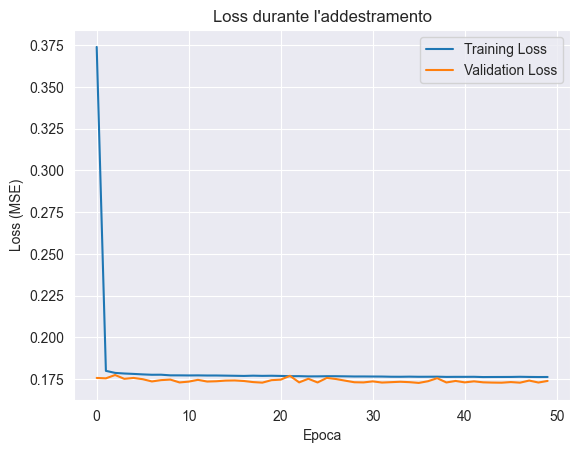

In [16]:
import matplotlib.pyplot as plt

# Grafico della perdita durante l'addestramento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss durante l\'addestramento')
plt.xlabel('Epoca')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()


In [17]:
from tensorflow.keras.optimizers import AdamW, RMSprop

# Con AdamW
optimizer = AdamW(learning_rate=0.001, weight_decay=1e-5)

# Con RMSprop
# optimizer = RMSprop(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Compilazione del modello
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])


In [18]:
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,  # Numero iniziale di epoche
    batch_size=128,
    verbose=1
)


Epoch 1/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - loss: 0.1759 - mae: 0.3175 - val_loss: 0.1730 - val_mae: 0.3147
Epoch 2/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - loss: 0.1771 - mae: 0.3180 - val_loss: 0.1736 - val_mae: 0.3138
Epoch 3/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - loss: 0.1766 - mae: 0.3175 - val_loss: 0.1728 - val_mae: 0.3134
Epoch 4/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - loss: 0.1764 - mae: 0.3175 - val_loss: 0.1729 - val_mae: 0.3146
Epoch 5/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - loss: 0.1762 - mae: 0.3175 - val_loss: 0.1725 - val_mae: 0.3141
Epoch 6/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - loss: 0.1764 - mae: 0.3175 - val_loss: 0.1728 - val_mae: 0.3129
Epoch 7/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - loss: 0.1756 - mae: 0.3167 - val_loss: 0.1729 - val_mae: 0.3148
Epoch 8/50
8677/8677 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - loss: 0.1758 - mae: 0.3173 - val_loss: 0.1733 - val_mae: 0.3131
Epoch 9/50
8677/8677 ━━━━━━━━━━━

In [19]:
# Predizioni e valutazione sul test set
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')


7438/7438 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step
Mean Squared Error (MSE): 0.17279384223869673
Mean Absolute Error (MAE): 0.31428113439988087


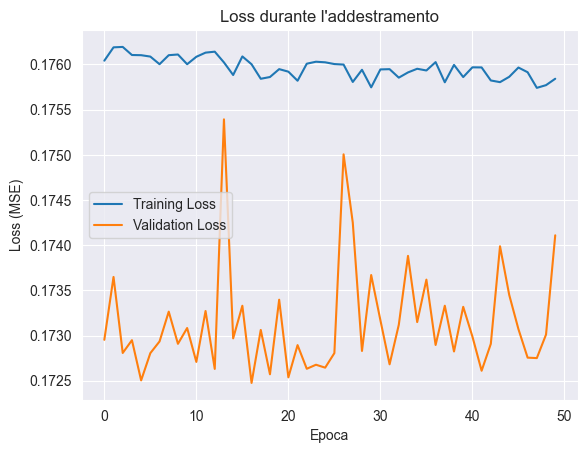

In [20]:
import matplotlib.pyplot as plt

# Grafico della perdita durante l'addestramento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss durante l\'addestramento')
plt.xlabel('Epoca')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()


In [33]:
# Architettura con più livelli
best_model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])
# Compilazione del modello
#best_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
best_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])


# Salvataggio del modello definitivo
best_model.save("best_beer_model1.h5")
print("Modello salvato come 'best_beer_model1.h5'")


C:\Users\CRAIA-AREA EDUCATORI\Documents\Università\interprete\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Modello salvato come 'best_beer_model1.h5'


In [23]:
#risolvibile così, ma non causa problemi
#
#from tensorflow.keras import Input
#
#model = Sequential([
#    Input(shape=(num_features,)),  # Usa Input invece di input_shape direttamente nei layer
#    Dense(128, activation='relu'),
#    Dense(64, activation='relu'),
#    Dense(1, activation='linear')
#])
#
#
# Salvataggio nel formato nativo di Keras
#model.save("best_beer_model.keras")
#

In [36]:
# feature usate per l'addestramento del modello
feature_columns = [
    'review_aroma', 'review_appearance', 'review_palate',
    'review_taste'
]

# Verifica che non ci siano valori nulli (sostituiscili se necessario)
X_new = df[feature_columns].copy()
X_new = X_new.fillna(0)  # Riempie eventuali valori nulli con 0

# Normalizza i dati (usando lo stesso scaler del training)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new)  # Sostituisci con `.transform()` se hai già uno scaler salvato.


In [37]:
from tensorflow.keras.models import load_model

# Carica il modello salvato
loaded_model = load_model("best_beer_model1.h5")

#best_beer_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Effettua le predizioni
predizioni = loaded_model.predict(X_new_scaled)

# Converti le predizioni in un DataFrame per maggiore chiarezza
import pandas as pd
risultati = pd.DataFrame({
    'Predizione': predizioni.flatten(),
    'Beer_Name': df['beer_name'],  # Colonna del nome della birra
    'Beer_Style': df['beer_style'],  # Colonna dello stile della birra
    'Overall_Review': df['review_overall']  # Colonna del punteggio reale
})

print(risultati.head())  # Mostra i primi risultati


49582/49582 ━━━━━━━━━━━━━━━━━━━━ 86s 2ms/step
   Predizione               Beer_Name                      Beer_Style  \
0    0.283213            Sausa Weizen                      Hefeweizen   
1    0.139127                Red Moon              English Strong Ale   
2    0.139127  Black Horse Black Beer          Foreign / Export Stout   
3    0.160911              Sausa Pils                 German Pilsener   
4   -0.033751           Cauldron DIPA  American Double / Imperial IPA   

   Overall_Review  
0             1.5  
1             3.0  
2             3.0  
3             3.0  
4             4.0  


Errore medio delle predizioni: -3.79594067668331


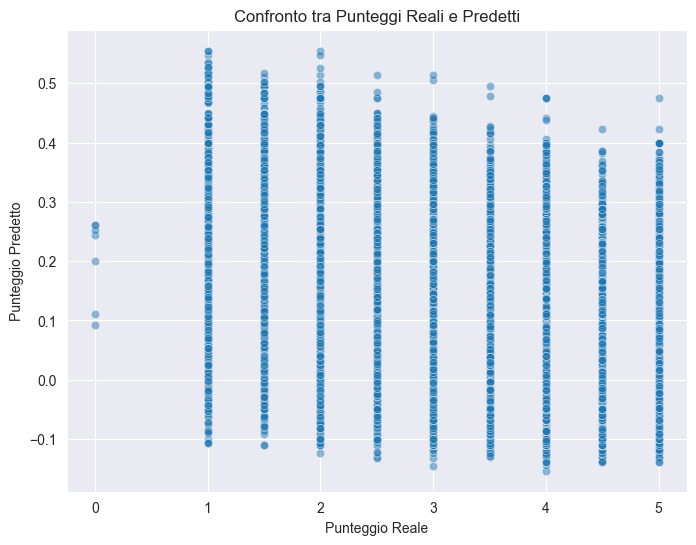

In [38]:
# Confronto predizioni vs punteggi reali
risultati['Differenza'] = risultati['Predizione'] - risultati['Overall_Review']

# Statistiche sulle differenze
print("Errore medio delle predizioni:", risultati['Differenza'].mean())

# Visualizzazione
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=risultati, x='Overall_Review', y='Predizione', alpha=0.5)
plt.title("Confronto tra Punteggi Reali e Predetti")
plt.xlabel("Punteggio Reale")
plt.ylabel("Punteggio Predetto")
plt.show()


In [ ]:
# Qui si evidenzia una certa difficoltà del modello a seguire fedelmente i punteggi reali, con predizioni che spesso divergono.
# È possibile notare che le predizioni tendono a una distribuzione "compressa", il che potrebbe indicare che il modello è regolarizzato troppo o che i dati di input non rappresentano abbastanza bene le caratteristiche per distinguere accuratamente tra i punteggi

In [39]:
# Salva il DataFrame in un file CSV
risultati.to_csv("predizioni_birra.csv", index=False)

print("File CSV salvato come 'predizioni_birra.csv'.")


File CSV salvato come 'predizioni_birra.csv'.


In [40]:
# Calcolare l'errore assoluto
risultati['Errore_Assoluto'] = abs(risultati['Differenza'])

# Visualizzare le righe con l'errore maggiore
errore_soglia = 1  # Puoi cambiare questa soglia se necessario
errore_grande = risultati[risultati['Errore_Assoluto'] > errore_soglia]

# Mostra le anomalie
print("Anomalie (errore maggiore di 1):")
print(errore_grande)

# Statistiche sugli errori
print("\nStatistiche sugli errori assoluti:")
print(risultati['Errore_Assoluto'].describe())


Anomalie (errore maggiore di 1):
         Predizione               Beer_Name                      Beer_Style  \
0          0.283213            Sausa Weizen                      Hefeweizen   
1          0.139127                Red Moon              English Strong Ale   
2          0.139127  Black Horse Black Beer          Foreign / Export Stout   
3          0.160911              Sausa Pils                 German Pilsener   
4         -0.033751           Cauldron DIPA  American Double / Imperial IPA   
...             ...                     ...                             ...   
1586609   -0.023143      The Horseman's Ale                     Pumpkin Ale   
1586610   -0.039040      The Horseman's Ale                     Pumpkin Ale   
1586611    0.007058      The Horseman's Ale                     Pumpkin Ale   
1586612   -0.048608      The Horseman's Ale                     Pumpkin Ale   
1586613   -0.048608      The Horseman's Ale                     Pumpkin Ale   

         Overall_R

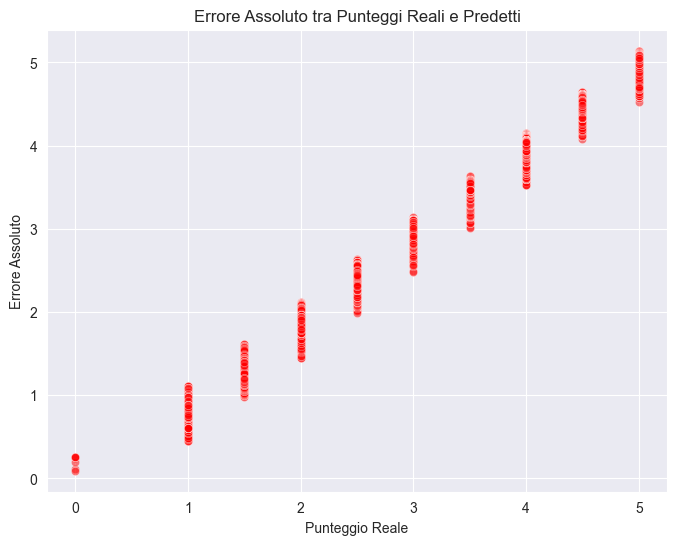

In [41]:
# Grafico dell'errore assoluto
plt.figure(figsize=(8, 6))
sns.scatterplot(data=risultati, x='Overall_Review', y='Errore_Assoluto', alpha=0.5, color='red')
plt.title("Errore Assoluto tra Punteggi Reali e Predetti")
plt.xlabel("Punteggio Reale")
plt.ylabel("Errore Assoluto")
plt.show()


In [ ]:
#Il grafico mostra una distribuzione degli errori assoluti tra i punteggi reali e predetti.
#Gli errori sono maggiori per i punteggi reali più alti, suggerendo che il modello fatica a predire accuratamente nei casi di punteggi più elevati.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Caricamento del dataset
df = pd.read_csv('C:\\Users\\CRAIA-AREA EDUCATORI\\Documents\\Università\\Machine Learning\\beer_data\\beer_reviews.csv')

# Selezione delle colonne numeriche rilevanti
X_numeric = df[["review_aroma", "review_appearance", "review_palate", "review_taste", "beer_abv"]]

# Encoding delle variabili categoriche
beer_style_encoder = LabelEncoder()
brewery_encoder = LabelEncoder()

df["beer_style_encoded"] = beer_style_encoder.fit_transform(df["beer_style"])
df["brewery_encoded"] = brewery_encoder.fit_transform(df["brewery_name"])

# Target (review_overall)
y = df["review_overall"]

# Dividiamo i dati in train/test
X_numeric_train, X_numeric_test, beer_style_train, beer_style_test, brewery_train, brewery_test, y_train, y_test = train_test_split(
    X_numeric, df["beer_style_encoded"], df["brewery_encoded"], y, test_size=0.2, random_state=42
)


In [8]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Definizione degli input
numeric_input = Input(shape=(X_numeric_train.shape[1],), name="numeric_input")
beer_style_input = Input(shape=(1,), name="beer_style_input")
brewery_input = Input(shape=(1,), name="brewery_input")

# Embedding per beer_style
beer_style_embedding = Embedding(
    input_dim=len(beer_style_encoder.classes_),  # Numero di stili unici
    output_dim=10,  # Dimensione dello spazio embedding
    input_length=1,
    name="beer_style_embedding"
)(beer_style_input)
beer_style_embedding_flat = Flatten()(beer_style_embedding)

# Embedding per brewery
brewery_embedding = Embedding(
    input_dim=len(brewery_encoder.classes_),  # Numero di birrifici unici
    output_dim=10,  # Dimensione dello spazio embedding
    input_length=1,
    name="brewery_embedding"
)(brewery_input)
brewery_embedding_flat = Flatten()(brewery_embedding)

# Concatenazione degli input
merged = Concatenate(name="merged_layer")([numeric_input, beer_style_embedding_flat, brewery_embedding_flat])

# Rete densa
x = Dense(128, activation="relu")(merged)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(64, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(32, activation="relu")(x)
x = BatchNormalization()(x)

# Output
output = Dense(1, activation="linear", name="output")(x)

# Creazione del modello
optimized_model = Model(inputs=[numeric_input, beer_style_input, brewery_input], outputs=output, name="Optimized_Model")

# Compilazione del modello
optimized_model.compile(optimizer=Adam(learning_rate=0.001), loss="mse", metrics=["mae"])

# Sommario del modello
optimized_model.summary()


C:\Users\CRAIA-AREA EDUCATORI\Documents\Università\interprete\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "Optimized_Model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ beer_style_input    │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ brewery_input       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ beer_style_embeddi… │ (None, 1, 10)     │      1,040 │ beer_style_input… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ brewery_embedding   │ (None, 1, 10)     │     57,430 │ brewery_input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numeric_input       │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 10)        │          0 │ beer_style_embed… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 10)        │          0 │ brewery_embeddin… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ merged_layer        │ (None, 25)        │          0 │ numeric_input[0]… │
│ (Concatenate)       │                   │            │ flatten[0][0],    │
│                     │                   │            │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │      3,328 │ merged_layer[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128)       │        512 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 32)        │      2,080 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dense_2[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         33 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 73,063 (285.40 KB)

 Trainable params: 72,615 (283.65 KB)

 Non-trainable params: 448 (1.75 KB)

In [9]:
# Training
history = optimized_model.fit(
    [X_numeric_train, beer_style_train, brewery_train],
    y_train,
    validation_split=0.2,
    batch_size=64,
    epochs=50,
    verbose=1
)


Epoch 1/50
15867/15867 ━━━━━━━━━━━━━━━━━━━━ 113s 7ms/step - loss: 1.1407 - mae: 0.7164 - val_loss: 0.5180 - val_mae: 0.5506
Epoch 2/50
15867/15867 ━━━━━━━━━━━━━━━━━━━━ 83s 5ms/step - loss: 0.5241 - mae: 0.5526 - val_loss: 0.5180 - val_mae: 0.5518
Epoch 3/50
15867/15867 ━━━━━━━━━━━━━━━━━━━━ 86s 5ms/step - loss: 0.5198 - mae: 0.5500 - val_loss: 0.5230 - val_mae: 0.5322
Epoch 4/50
15867/15867 ━━━━━━━━━━━━━━━━━━━━ 84s 5ms/step - loss: 0.5219 - mae: 0.5521 - val_loss: 0.5181 - val_mae: 0.5475
Epoch 5/50
15867/15867 ━━━━━━━━━━━━━━━━━━━━ 83s 5ms/step - loss: 0.5208 - mae: 0.5513 - val_loss: 0.5271 - val_mae: 0.5756
Epoch 6/50
15867/15867 ━━━━━━━━━━━━━━━━━━━━ 83s 5ms/step - loss: 0.5234 - mae: 0.5529 - val_loss: 0.5187 - val_mae: 0.5435
Epoch 7/50
15867/15867 ━━━━━━━━━━━━━━━━━━━━ 149s 6ms/step - loss: 0.5220 - mae: 0.5523 - val_loss: 0.5238 - val_mae: 0.5707
Epoch 8/50
15867/15867 ━━━━━━━━━━━━━━━━━━━━ 89s 6ms/step - loss: 0.5214 - mae: 0.5519 - val_loss: 0.5195 - val_mae: 0.5407
Epoch 9/50
158

In [10]:
# Valutazione sul test set
test_loss, test_mae = optimized_model.evaluate(
    [X_numeric_test, beer_style_test, brewery_test],
    y_test,
    verbose=0
)

print(f"Nuovo modello - MSE sul test set: {test_loss}")
print(f"Nuovo modello - MAE sul test set: {test_mae}")


Nuovo modello - MSE sul test set: 0.5184901356697083
Nuovo modello - MAE sul test set: 0.5492730736732483


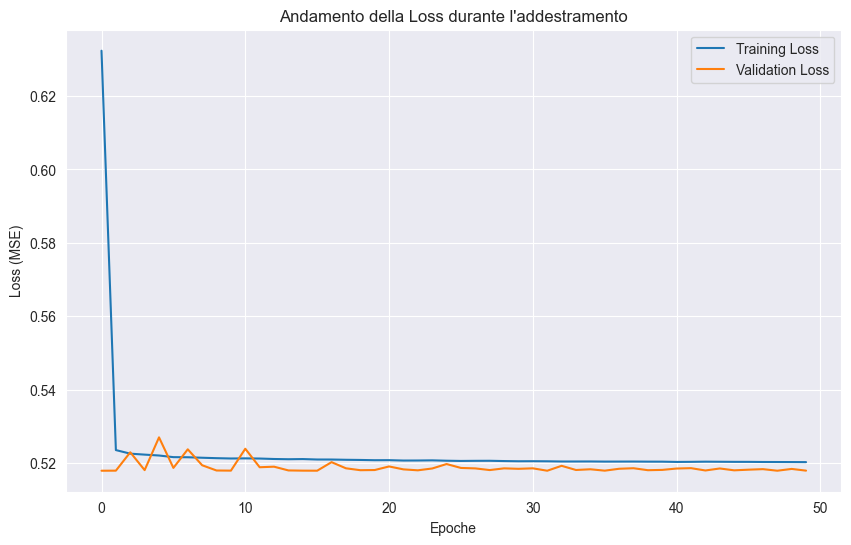

9917/9917 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step


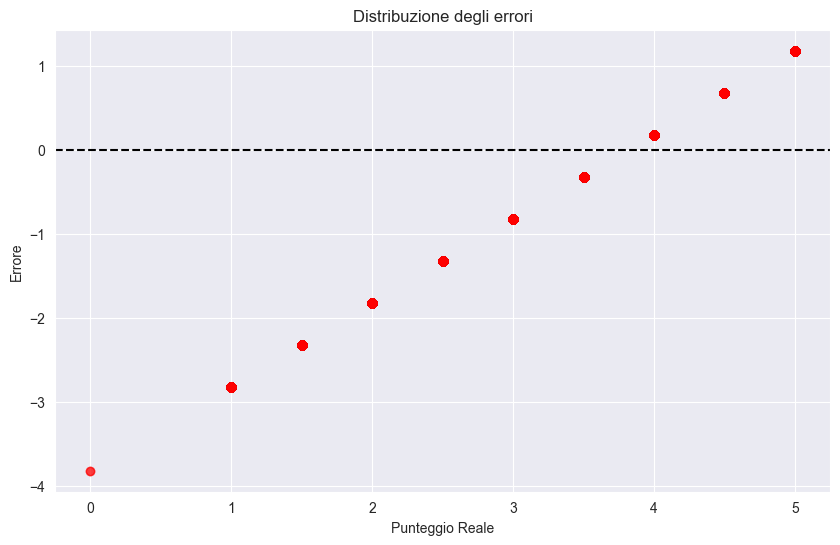

In [11]:
import matplotlib.pyplot as plt

# Grafico Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Andamento della Loss durante l'addestramento")
plt.xlabel("Epoche")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

# Errori sulle predizioni
y_pred = optimized_model.predict([X_numeric_test, beer_style_test, brewery_test])
errors = y_test - y_pred.flatten()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, errors, alpha=0.5, c='red')
plt.axhline(0, color='black', linestyle='--')
plt.title("Distribuzione degli errori")
plt.xlabel("Punteggio Reale")
plt.ylabel("Errore")
plt.show()


In [2]:
#Distribuzione degli errori:
#Mostra una tendenza in cui gli errori diventano più positivi con il crescere del punteggio reale. Questo potrebbe indicare una leggera sotto-stima per i punteggi bassi e una sovra-stima per i punteggi alti. È un pattern comune nei modelli di regressione, suggerendo che il modello non sta catturando tutte le variazioni nei dati.

#Andamento della loss:
# È normale che il training loss parta alto e si riduca rapidamente, soprattutto nei primi passi dell'addestramento. Questo comportamento è legato al fatto che inizialmente i pesi del modello sono casuali e il modello deve adattarsi velocemente.
# Qui, il loss si stabilizza velocemente intorno a 0.52 (MSE). Non c'è un evidente overfitting, dato che la validazione segue il training loss.


Valori mancanti per colonna:
brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
beer_style_encoded        0
brewery_encoded           0
dtype: int64

Verifica di valori non numerici nelle colonne numeriche:


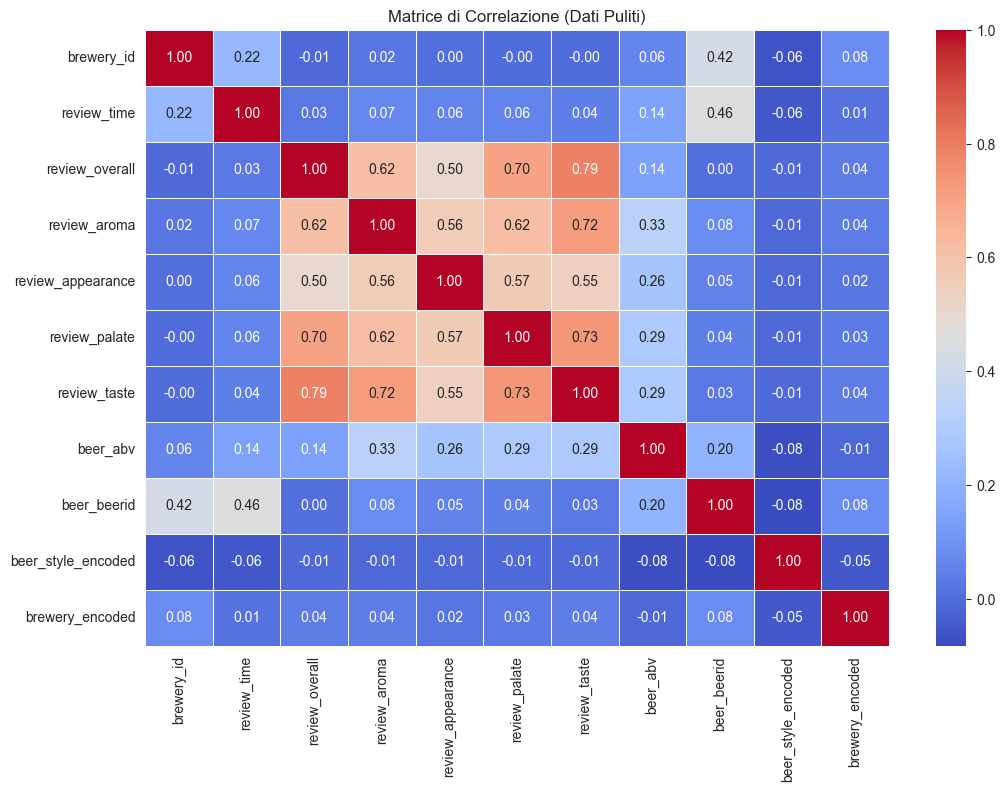


Statistiche descrittive delle feature numeriche:
         brewery_id   review_time  review_overall  review_aroma  \
count  1.586614e+06  1.586614e+06    1.586614e+06  1.586614e+06   
mean   3.130099e+03  1.224089e+09    3.815581e+00  3.735636e+00   
std    5.578104e+03  7.654427e+07    7.206219e-01  6.976167e-01   
min    1.000000e+00  8.406720e+08    0.000000e+00  1.000000e+00   
25%    1.430000e+02  1.173224e+09    3.500000e+00  3.500000e+00   
50%    4.290000e+02  1.239203e+09    4.000000e+00  4.000000e+00   
75%    2.372000e+03  1.288568e+09    4.500000e+00  4.000000e+00   
max    2.800300e+04  1.326285e+09    5.000000e+00  5.000000e+00   

       review_appearance  review_palate  review_taste      beer_abv  \
count       1.586614e+06   1.586614e+06  1.586614e+06  1.518829e+06   
mean        3.841642e+00   3.743701e+00  3.792860e+00  7.042387e+00   
std         6.160928e-01   6.822184e-01  7.319696e-01  2.322526e+00   
min         0.000000e+00   1.000000e+00  1.000000e+00  1.00000

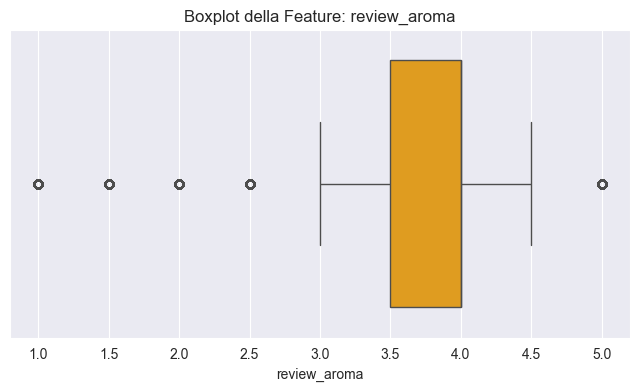

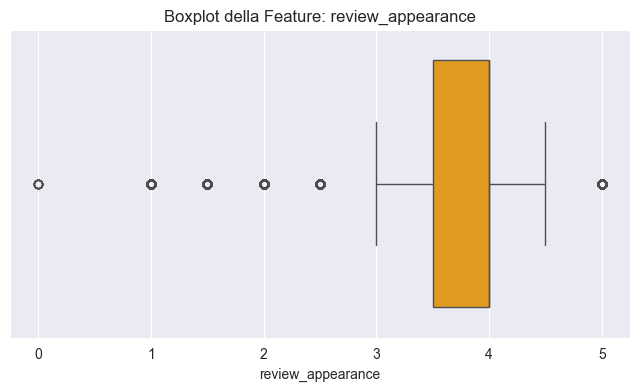

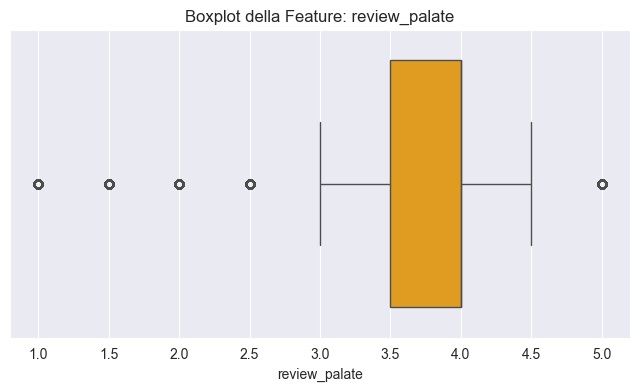

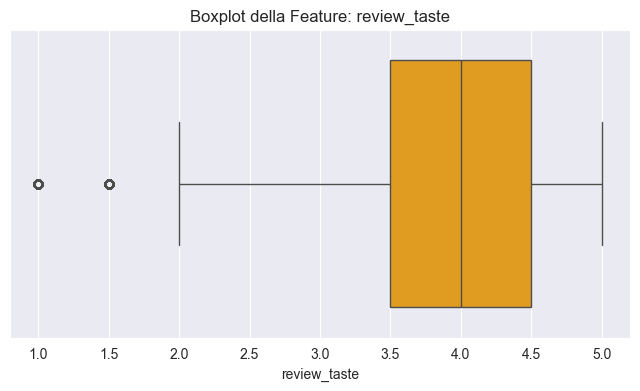

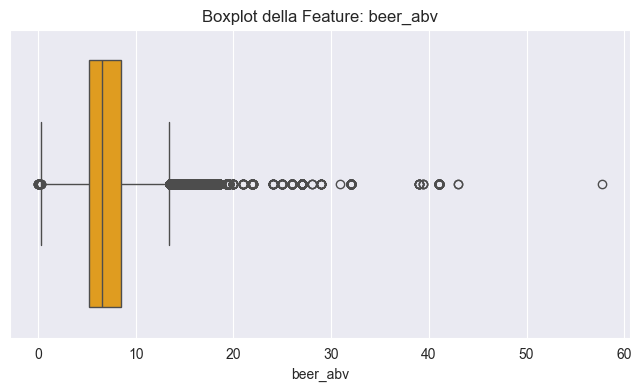

In [15]:
#Porzione di codice per andare a rilevare eventuali anomalie presenti nei dati che potrebbero influenzare l'addrestamento
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Verifica di valori mancanti
print("Valori mancanti per colonna:")
print(df.isnull().sum())

# Isolare le colonne numeriche
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Identificare eventuali colonne con dati problematici
print("\nVerifica di valori non numerici nelle colonne numeriche:")
for col in numerical_cols:
    try:
        # Forza la conversione in float per testare la pulizia dei dati
        df[col].astype(float)
    except ValueError:
        print(f"Attenzione: La colonna '{col}' contiene valori problematici.")

# Forzare la conversione ignorando errori (valori non validi diventano NaN)
cleaned_df = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Heatmap delle correlazioni, ignorando valori mancanti (NaN)
plt.figure(figsize=(12, 8))
correlation = cleaned_df.corr()  # Usa solo le colonne pulite
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice di Correlazione (Dati Puliti)")
plt.show()

# Statistiche descrittive (esclude automaticamente i NaN)
print("\nStatistiche descrittive delle feature numeriche:")
print(cleaned_df.describe())

# Boxplot per rilevare outlier nelle feature principali
features_to_plot = ['review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv']
for col in features_to_plot:
    if col in cleaned_df.columns:  # Controlla se la colonna esiste
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=cleaned_df[col], color="orange")
        plt.title(f"Boxplot della Feature: {col}")
        plt.show()
    else:
        print(f"Colonna '{col}' non trovata nel DataFrame pulito.")


In [ ]:
# Il dataset sembra ben bilanciato tranne per le osservazioni sui valori mancanti.
# la matrice di correlazione:
#Forti correlazioni:
    #review_overall ha una correlazione alta con:
        #review_taste (0.79): Questo suggerisce che il gusto ha un impatto significativo sul punteggio complessivo.
        #review_palate (0.70) e review_aroma (0.62): Anche queste dimensioni contribuiscono in modo rilevante.
        #review_taste è correlato con review_aroma (0.72) e review_palate (0.73): Probabile sovrapposizione tra le caratteristiche percepite dai revisori.
#Deboli correlazioni:
    #beer_abv ha correlazioni molto basse con tutte le variabili (massimo 0.33 con review_aroma): L'alcol in volume non sembra influenzare molto i punteggi o altre caratteristiche.
    #brewery_encoded e beer_style_encoded mostrano correlazioni prossime a zero con quasi tutte le altre feature, suggerendo che la codifica potrebbe non catturare informazioni utili.
#Colonne derivate:
#Le variabili come brewery_encoded e beer_style_encoded non sembrano essere particolarmente informative, ma potrebbero essere utili in combinazione con altre feature in modelli complessi.

In [21]:
#Predizione con rete neurale densa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd

# Definiamo le feature (X) e la variabile target (y)
X = df.drop(columns=['review_aroma', 'review_appearance', 'review_palate', 'review_taste'])  # Rimuoviamo colonne target
y = df['review_overall']

# Rimuovere eventuali colonne non numeriche da X
X = X.select_dtypes(include=['float64', 'int64'])

# Gestione di valori mancanti
X = X.fillna(X.mean())  # Sostituisce NaN con la media delle colonne
y = y.fillna(y.mean())

# Dividiamo i dati in set di training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizzazione delle feature
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creazione del modello di rete neurale
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Primo livello nascosto
    Dropout(0.3),  # Dropout per ridurre overfitting
    Dense(32, activation='relu'),  # Secondo livello nascosto
    Dropout(0.3),
    Dense(1, activation='linear')  # Livello di output (regressione)
])

# Compilazione del modello
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Addestramento del modello
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Valutazione sul set di test
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Confronto tra previsioni e valori reali
comparison_df = pd.DataFrame({
    'Valori Reali': y_test[:10].values,  # Primi 10 valori reali
    'Previsioni': y_pred[:10].flatten()  # Primi 10 valori previsti
})

print("\nConfronto tra valori reali e previsioni:")
print(comparison_df)


C:\Users\CRAIA-AREA EDUCATORI\Documents\Università\interprete\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
31733/31733 ━━━━━━━━━━━━━━━━━━━━ 186s 6ms/step - loss: 0.3198 - mae: 0.3276 - val_loss: 0.0184 - val_mae: 0.0730
Epoch 2/50
31733/31733 ━━━━━━━━━━━━━━━━━━━━ 147s 4ms/step - loss: 0.0210 - mae: 0.0903 - val_loss: 0.0211 - val_mae: 0.0796
Epoch 3/50
31733/31733 ━━━━━━━━━━━━━━━━━━━━ 123s 4ms/step - loss: 0.0209 - mae: 0.0901 - val_loss: 0.0139 - val_mae: 0.0593
Epoch 4/50
31733/31733 ━━━━━━━━━━━━━━━━━━━━ 141s 4ms/step - loss: 0.0207 - mae: 0.0896 - val_loss: 0.0163 - val_mae: 0.0503
Epoch 5/50
31733/31733 ━━━━━━━━━━━━━━━━━━━━ 123s 4ms/step - loss: 0.0209 - mae: 0.0897 - val_loss: 0.0180 - val_mae: 0.0656
Epoch 6/50
31733/31733 ━━━━━━━━━━━━━━━━━━━━ 124s 4ms/step - loss: 0.0206 - mae: 0.0894 - val_loss: 0.0243 - val_mae: 0.0638
Epoch 7/50
31733/31733 ━━━━━━━━━━━━━━━━━━━━ 127s 4ms/step - loss: 0.0206 - mae: 0.0893 - val_loss: 0.0227 - val_mae: 0.0759
Epoch 8/50
31733/31733 ━━━━━━━━━━━━━━━━━━━━ 132s 4ms/step - loss: 0.0206 - mae: 0.0893 - val_loss: 0.0164 - val_mae: 0.0540
Epoch 9/

C:\Users\CRAIA-AREA EDUCATORI\Documents\Università\interprete\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
#Metriche di errore:
#MAE (0.0785): L'errore medio assoluto è molto basso, il che significa che il modello è in grado di predire i valori di review_overall con una buona precisione.
#RMSE (0.1436): La radice dell'errore quadratico medio è anch'essa bassa, indicando che le deviazioni dalle previsioni sono contenute.

#Confronto tra valori reali e previsioni:
#Il modello prevede valori molto vicini a quelli reali. Ad esempio, un valore reale di 4.0 viene predetto come 3.990 o 3.973, il che dimostra che il modello riesce a catturare bene le caratteristiche.

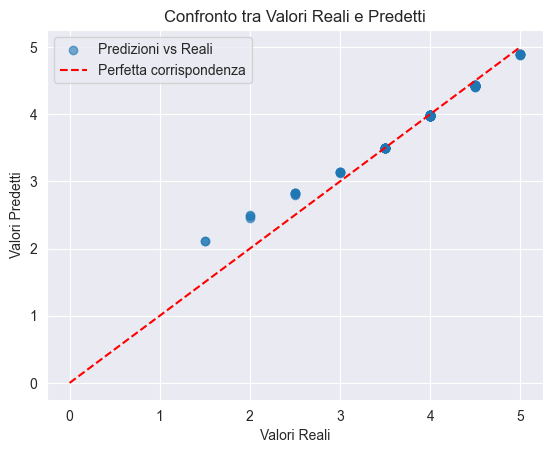

In [22]:
import matplotlib.pyplot as plt

plt.scatter(y_test[:100], y_pred[:100], alpha=0.6, label="Predizioni vs Reali")
plt.plot([0, 5], [0, 5], '--r', label="Perfetta corrispondenza")
plt.xlabel("Valori Reali")
plt.ylabel("Valori Predetti")
plt.title("Confronto tra Valori Reali e Predetti")
plt.legend()
plt.show()
